Planet dictionary loaded:
OrderedDict([('b', {'P': 121.73635809008535, 'limits_folded_x': [-0.25, 1.25], 'transit_folded': False, 'K_error_1sigma': 0.1439212523773336, 'K_error_2sigma': 0.28803793310284376, 'K_error_3sigma': 0.44363425726112826}), ('c', {'P': 41.406859673653, 'limits_folded_x': [-0.25, 1.25], 'transit_folded': False, 'K_error_1sigma': 0.1152873835575195, 'K_error_2sigma': 0.23354511533511912, 'K_error_3sigma': 0.34943334432001594})])

GENERATING FOLDED RV PLOTS

Processing planet b...
Planet b, RV curve folded around the reference time
Folded plot for planet b saved to: HD102365_all_instr_gp_2p_emcee_b_folded.png

Processing planet c...
Planet c, RV curve folded around the reference time
Folded plot for planet c saved to: HD102365_all_instr_gp_2p_emcee_c_folded.png

GENERATING FULL RV TIME SERIES PLOT
Processing dataset: HD102365_ESPRESSO_RV
Processing dataset: HD102365_HARPS-Post_RV
Processing dataset: HD102365_HARPS-Pre_RV
Processing dataset: HD102365_HIRES-Post_RV
P

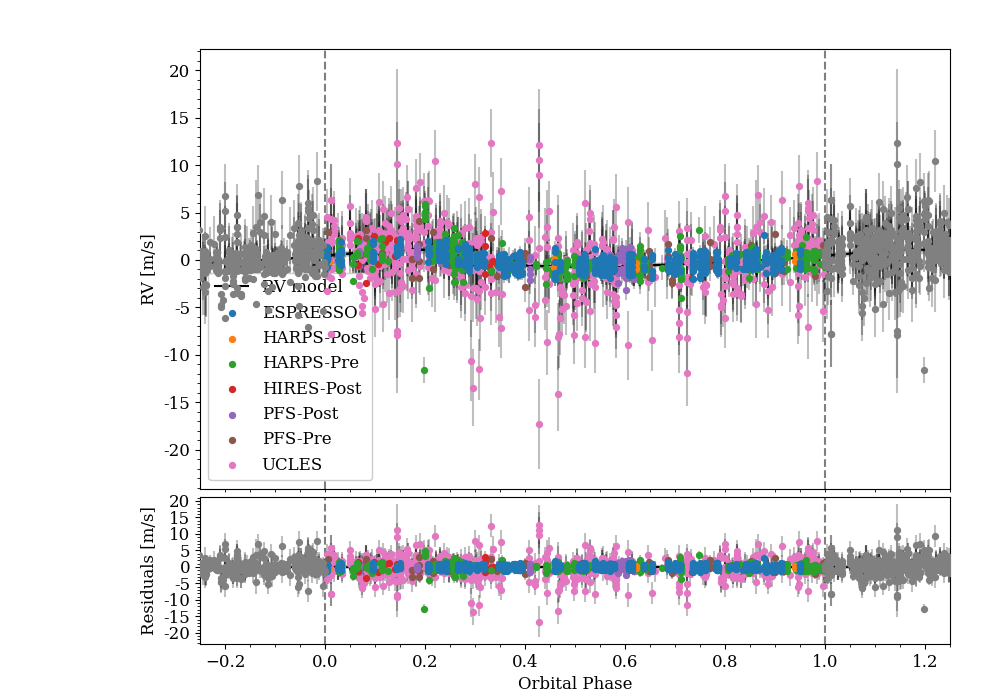

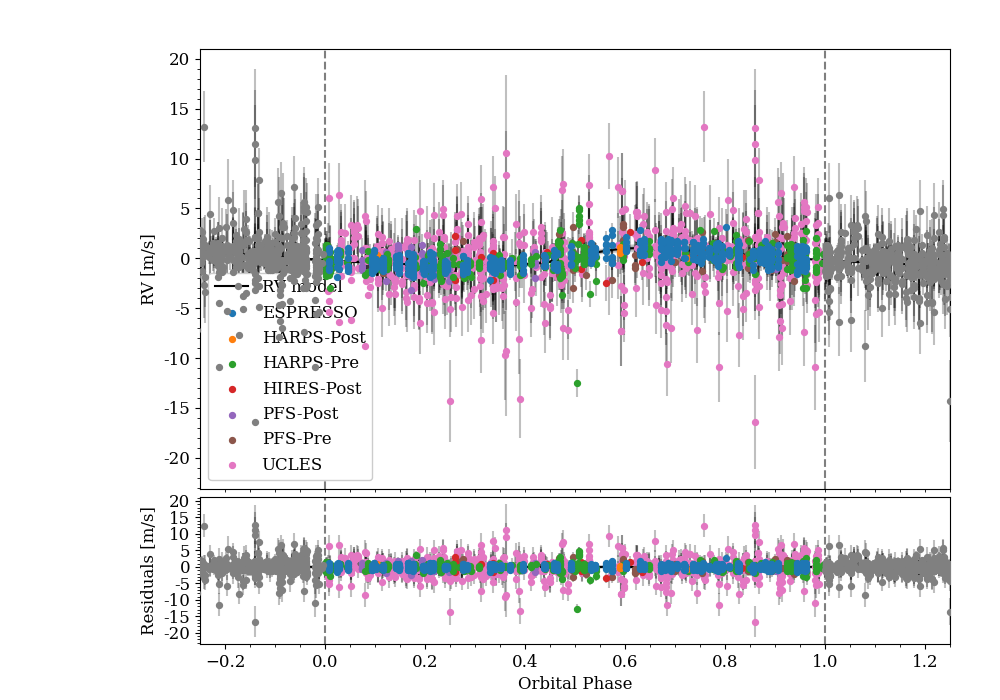

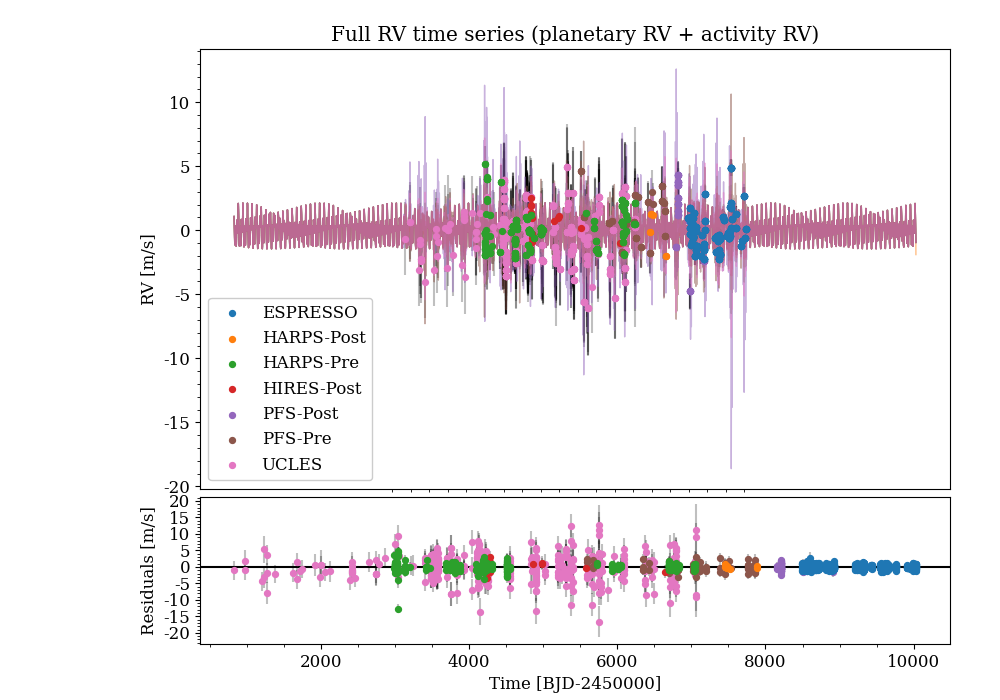

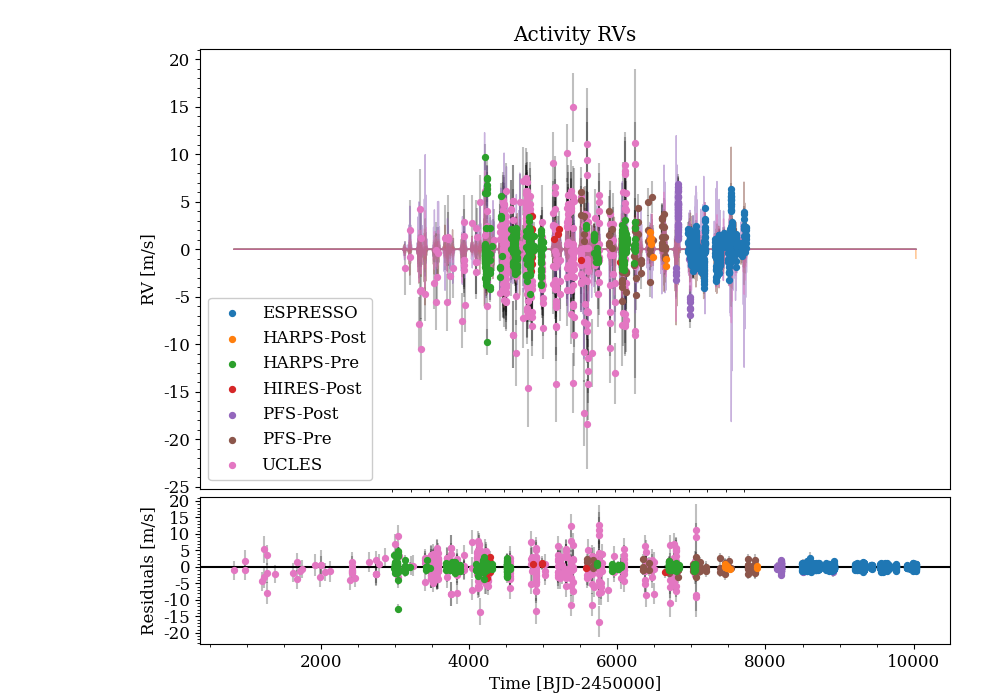

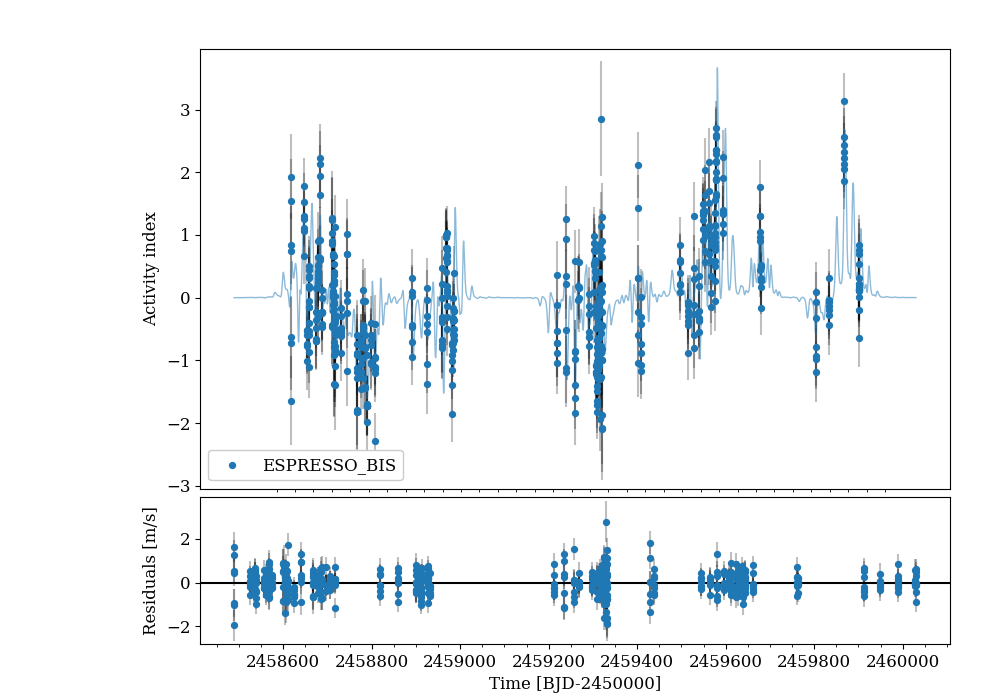

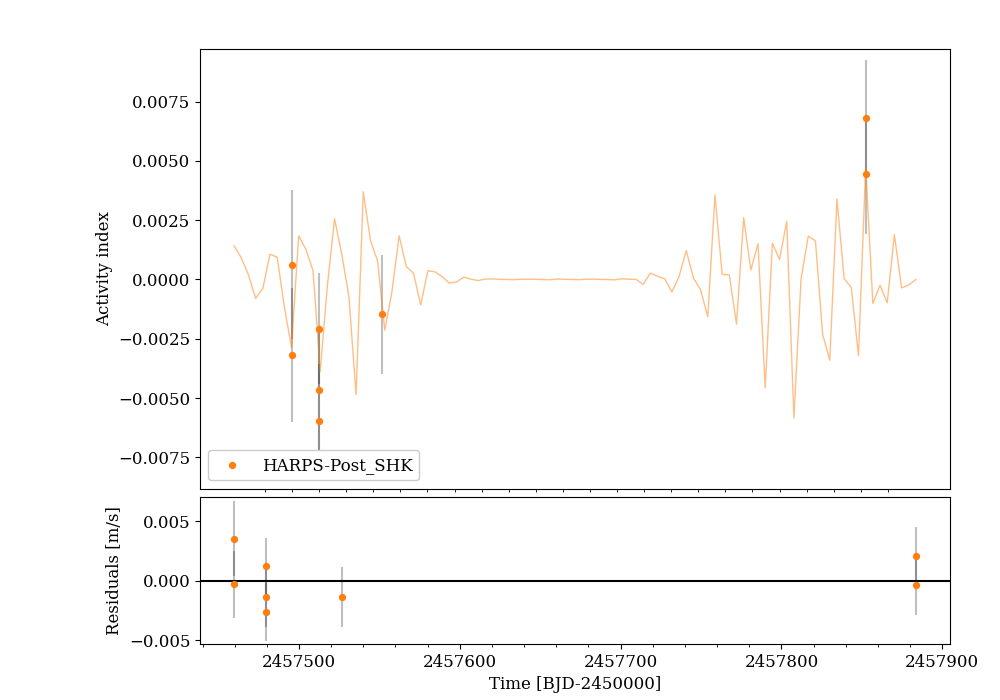

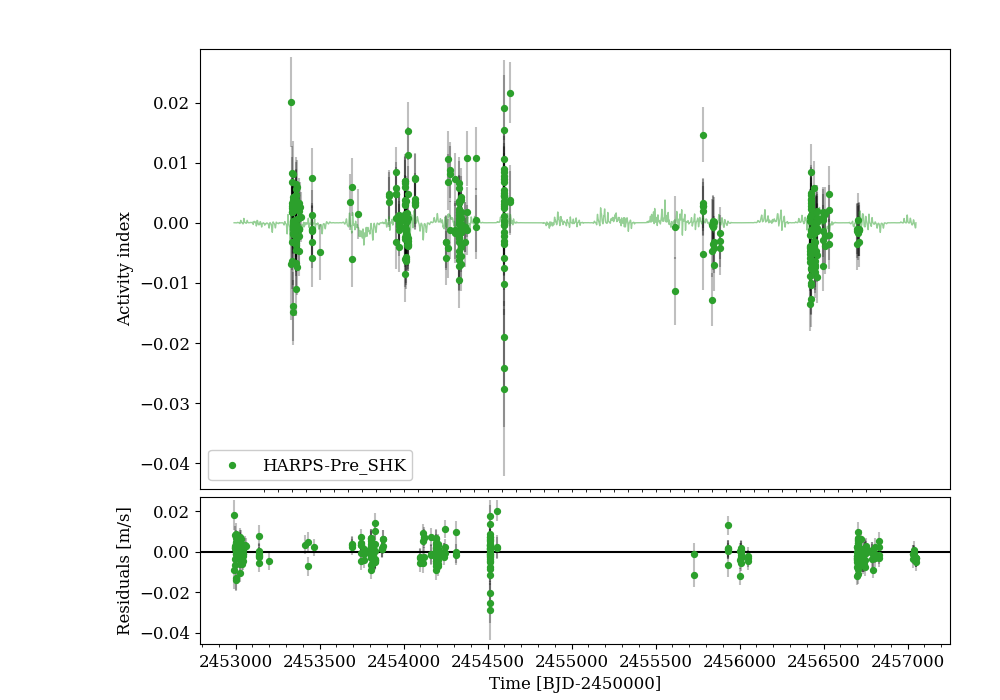

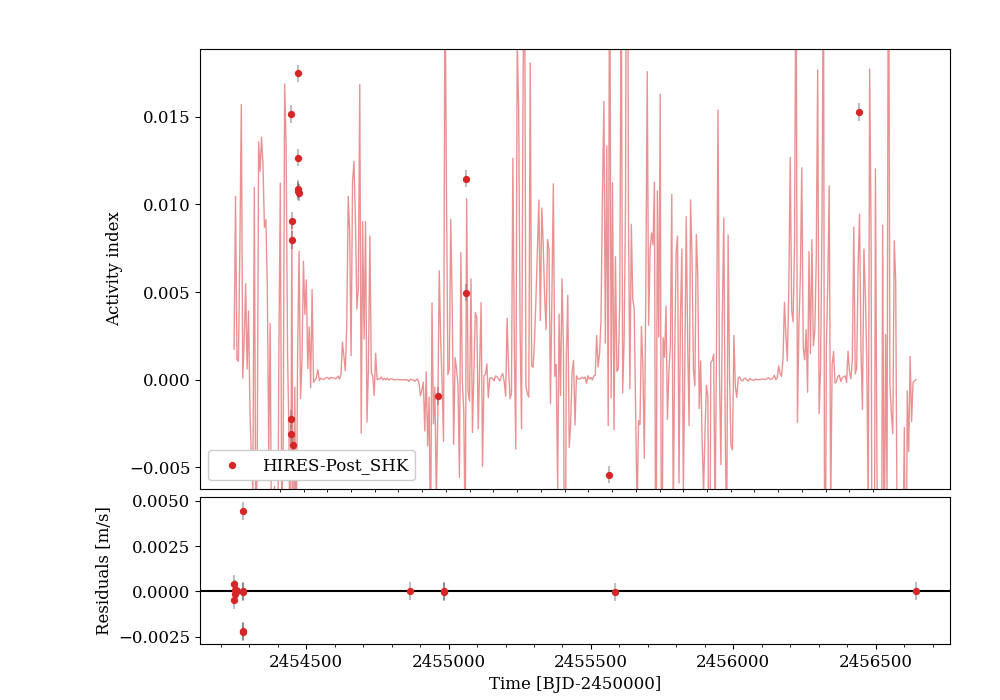

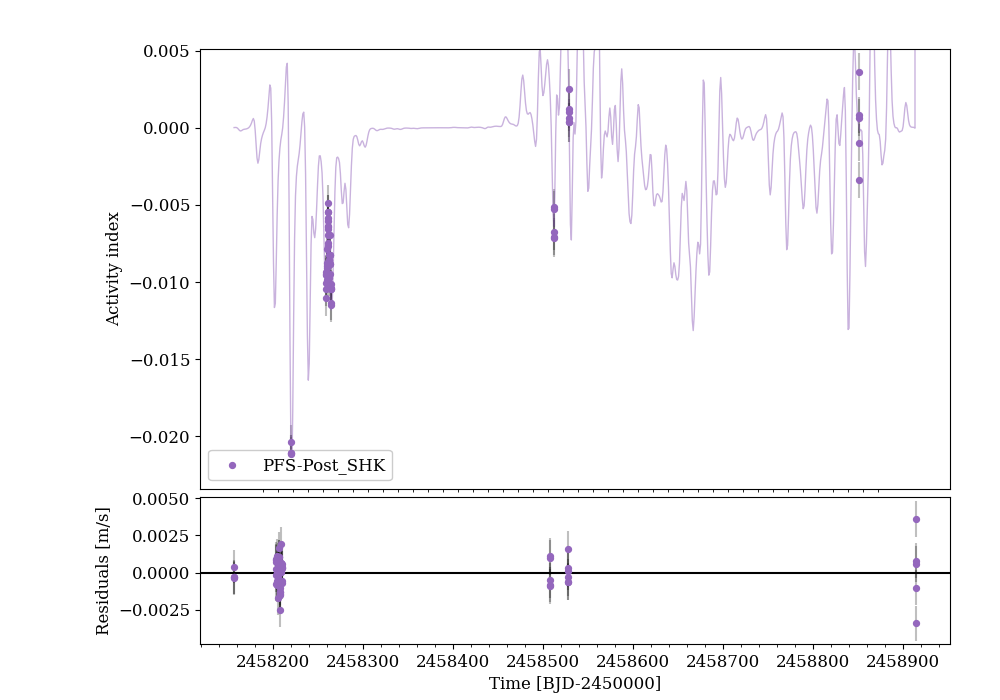

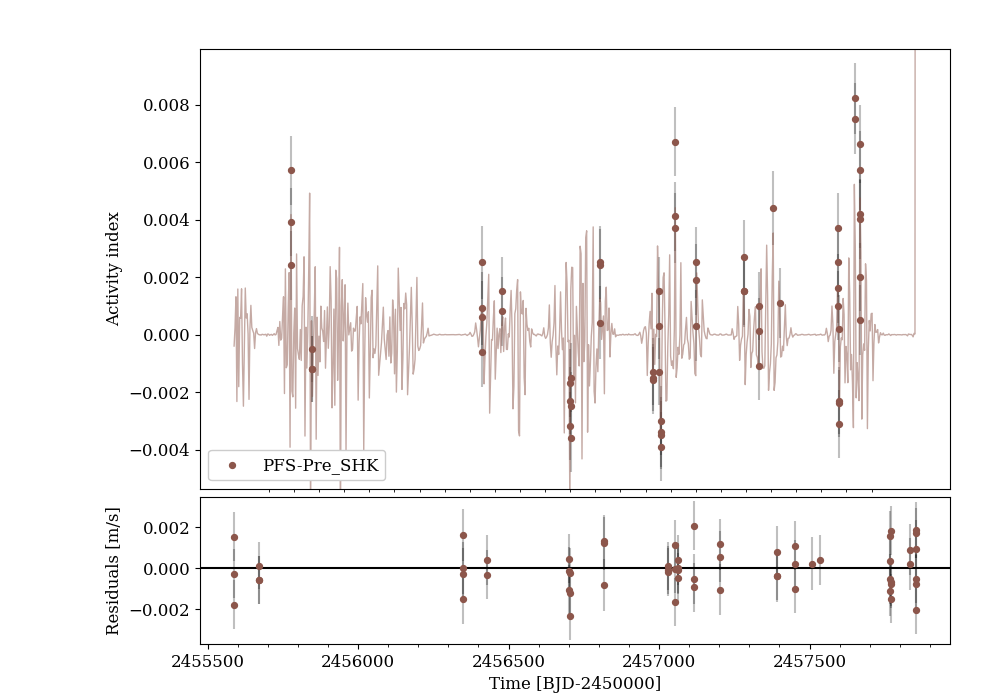

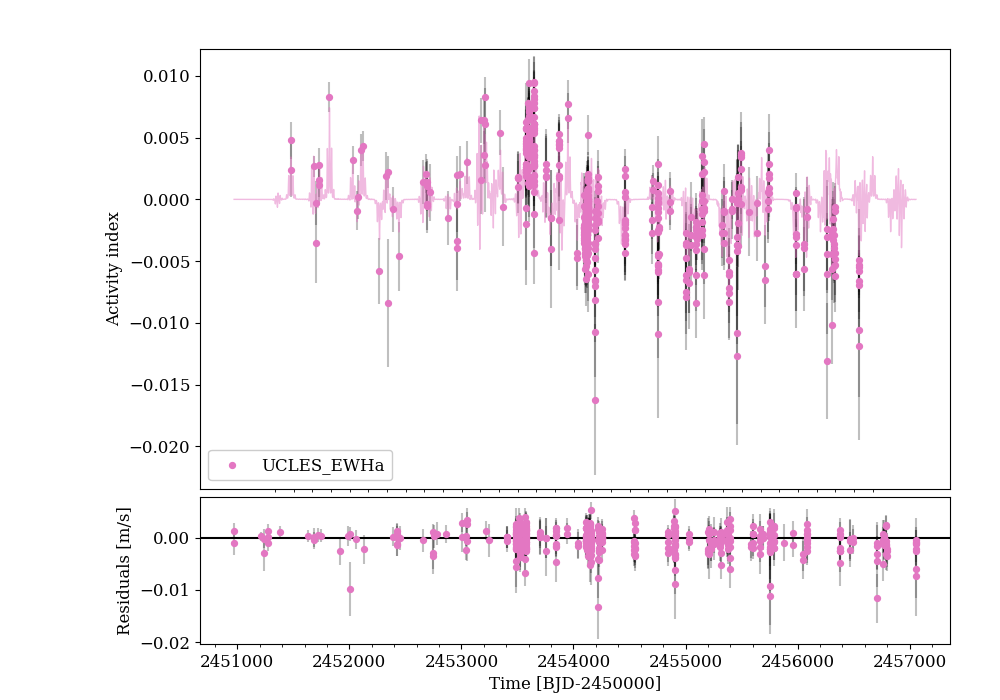

In [ ]:
"""
Combined RV and Activity Plotting Notebook
Easily customizable for different datasets
"""

# Planet configuration
# Set to True to enable planet c, False to disable
ENABLE_PLANET_C = True

# ============================================================================
# CONFIGURATION SECTION - CUSTOMIZE HERE
# ============================================================================

if 1: # HD 102365 (updated for new yaml configuration)
    # Base directories: you can customize as needed for new run directories or outputs
    dir_base = '/work2/lbuc/iara/GitHub/PyORBIT_examples/HD102365/results_HD102365/all_instr/gp/2p/HD102365_all_instr_gp_2p_emcee/'
    dir_mods = 'HD102365_all_instr_gp_2p_emcee/'
    dir_plot = 'emcee_plot/model_files/'
    filename = 'HD102365_all_instr_gp_2p_emcee'

    # --- RV Datasets and labels according to yaml ---
    datasets_list = [
        'HD102365_ESPRESSO_RV',
        'HD102365_HARPS-Post_RV',
        'HD102365_HARPS-Pre_RV',
        'HD102365_HIRES-Post_RV',
        'HD102365_PFS-Post_RV',
        'HD102365_PFS-Pre_RV',
        'HD102365_UCLES_RV'
    ]
    datasets_labels = {
        'HD102365_ESPRESSO_RV':   'ESPRESSO',
        'HD102365_HARPS-Post_RV': 'HARPS-Post',
        'HD102365_HARPS-Pre_RV':  'HARPS-Pre',
        'HD102365_HIRES-Post_RV': 'HIRES-Post',
        'HD102365_PFS-Post_RV':   'PFS-Post',
        'HD102365_PFS-Pre_RV':    'PFS-Pre',
        'HD102365_UCLES_RV':      'UCLES'
    }

    activity_model = 'gp_multidimensional'

    # --- Activity Datasets and labels from yaml ---
    activity_list = [
        'HD102365_ESPRESSO_BIS',
        #'HD102365_ESPRESSO_FWHM',
        'HD102365_HARPS-Post_SHK',
        'HD102365_HARPS-Pre_SHK',
        'HD102365_HIRES-Post_SHK',
        'HD102365_PFS-Post_SHK',
        'HD102365_PFS-Pre_SHK',
        'HD102365_UCLES_EWHa'
    ]
    activity_labels = {
        'HD102365_ESPRESSO_BIS':     'ESPRESSO_BIS',
        #'HD102365_ESPRESSO_FWHM':    'ESPRESSO_FWHM',
        'HD102365_HARPS-Post_SHK':   'HARPS-Post_SHK',
        'HD102365_HARPS-Pre_SHK':    'HARPS-Pre_SHK',
        'HD102365_HIRES-Post_SHK':   'HIRES-Post_SHK',
        'HD102365_PFS-Post_SHK':     'PFS-Post_SHK',
        'HD102365_PFS-Pre_SHK':      'PFS-Pre_SHK',
        'HD102365_UCLES_EWHa':       'UCLES_EWHa'
    }


    activity_dict = {
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
        # 'limits_full_y': [-13.5, 13.5],
        # 'limits_residuals_y': [-11.5, 11.5],
    }

    full_dict = {
        'reference_planet': 'b',
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
    }



# Plotting parameters
font_label = 12
dot_size = 18
figsize = (10, 7)

# ============================================================================
# END OF CONFIGURATION SECTION
# ============================================================================


# ============================================================================
# IMPORTS
# ============================================================================
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec
import matplotlib
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import itertools


# ============================================================================
# HELPER FUNCTIONS
# ============================================================================
def plots_in_grid():
    """
    Create a 2-panel grid layout for main plot and residuals
    """
    gs = gridspec.GridSpec(2, 1, height_ratios=[3.0, 1.0])
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
    
    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1])

    # Adding minor ticks only to x axis
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)

    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False, style='plain')
    ax_1.ticklabel_format(useOffset=False, style='plain')
    
    return ax_0, ax_1


# ============================================================================
# LOAD DATA AND SETUP PLANET DICTIONARY
# ============================================================================
summary_percentiles_parameters = pickle.load(
    open(dir_base + dir_mods + 'emcee_plot/dictionaries/summary_percentiles_parameters.p', 'rb')
)
summary_percentiles_derived = pickle.load(
    open(dir_base + dir_mods + 'emcee_plot/dictionaries/summary_percentiles_derived.p', 'rb')
)

planet_dict = collections.OrderedDict()

# Planet b configuration
planet_name = 'b'
planet_dict[planet_name] = {
    'P': summary_percentiles_parameters[planet_name]['P'][3],
    'limits_folded_x': [-0.25, 1.25],
    'transit_folded': False,
    'K_error_1sigma': (summary_percentiles_parameters[planet_name]['K'][4] - 
                       summary_percentiles_parameters[planet_name]['K'][2]) / 2,
    'K_error_2sigma': (summary_percentiles_parameters[planet_name]['K'][5] - 
                       summary_percentiles_parameters[planet_name]['K'][1]) / 2,
    'K_error_3sigma': (summary_percentiles_parameters[planet_name]['K'][6] - 
                       summary_percentiles_parameters[planet_name]['K'][0]) / 2,
}

# Planet c configuration (optional)
if ENABLE_PLANET_C:
    planet_name = 'c'
    planet_dict[planet_name] = {
        'P': summary_percentiles_parameters[planet_name]['P'][3],
        'limits_folded_x': [-0.25, 1.25],
        'transit_folded': False,
        'K_error_1sigma': (summary_percentiles_parameters[planet_name]['K'][4] - 
                           summary_percentiles_parameters[planet_name]['K'][2]) / 2,
        'K_error_2sigma': (summary_percentiles_parameters[planet_name]['K'][5] - 
                           summary_percentiles_parameters[planet_name]['K'][1]) / 2,
        'K_error_3sigma': (summary_percentiles_parameters[planet_name]['K'][6] - 
                           summary_percentiles_parameters[planet_name]['K'][0]) / 2,
    }

print("Planet dictionary loaded:")
print(planet_dict)


# ============================================================================
# PLOT 1: FOLDED RV PLOTS FOR EACH PLANET
# ============================================================================
print("\n" + "="*60)
print("GENERATING FOLDED RV PLOTS")
print("="*60)

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams.update({'font.size': font_label})

# Assign colors to datasets
dataset_colors = {}
for i, dataset in enumerate(datasets_list):
    dataset_colors[dataset] = 'C{}'.format(i)

for key_name, key_val in planet_dict.items():
    print(f"\nProcessing planet {key_name}...")
    
    RV_kep = np.genfromtxt(
        dir_base + dir_mods + dir_plot + 'RV_planet_' + key_name + '_kep.dat', 
        skip_header=1
    )

    if key_val.get('transit_folded', True):
        RV_pha = np.genfromtxt(
            dir_base + dir_mods + dir_plot + 'RV_planet_' + key_name + '_Tcf.dat', 
            skip_header=1
        )
    else:
        RV_pha = np.genfromtxt(
            dir_base + dir_mods + dir_plot + 'RV_planet_' + key_name + '_pha.dat', 
            skip_header=1
        )

    fig = plt.figure(figsize=figsize)
    ax_0, ax_1 = plots_in_grid()
    
    # Error bands
    K_error_1sigma = key_val['K_error_1sigma']
    K_error_2sigma = key_val['K_error_2sigma']
    K_error_3sigma = key_val['K_error_3sigma']
    K_rvs = np.amax(RV_pha[:, 1])
    RV_unitary = RV_pha[:, 1] / K_rvs
    
    ax_0.fill_between(RV_pha[:, 0], RV_unitary*(K_rvs-K_error_1sigma), 
                      y2=RV_unitary*(K_rvs+K_error_1sigma), 
                      alpha=0.10, color='black', zorder=0)
    ax_0.fill_between(RV_pha[:, 0], RV_unitary*(K_rvs-K_error_2sigma), 
                      y2=RV_unitary*(K_rvs+K_error_2sigma), 
                      alpha=0.10, color='black', zorder=0)
    ax_0.fill_between(RV_pha[:, 0], RV_unitary*(K_rvs-K_error_3sigma), 
                      y2=RV_unitary*(K_rvs+K_error_3sigma), 
                      alpha=0.10, color='black', zorder=0)
    
    # Plot model
    ax_0.plot(RV_pha[:, 0]-1, RV_pha[:, 1], color='k', linestyle='-', 
              zorder=2, label='RV model')
    ax_0.plot(RV_pha[:, 0]+1, RV_pha[:, 1], color='k', linestyle='-', zorder=2)

    # Plot data for each dataset
    for n_dataset, dataset in enumerate(datasets_list):
        color = dataset_colors[dataset]

        RV_mod = np.genfromtxt(
            dir_base + dir_mods + dir_plot + dataset + '_radial_velocities_' + key_name + '.dat', 
            skip_header=1
        )
        error = np.sqrt(RV_mod[:, 9]**2 + RV_mod[:, 12]**2)
    
        if key_val.get('transit_folded', False):
            rv_phase = RV_mod[:, 1] / planet_dict[key_name]['P']
        else:
            rv_phase = RV_mod[:, 2]
        
        # Main points
        ax_0.errorbar(rv_phase, RV_mod[:, 8], yerr=error, color='black', 
                      markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase, RV_mod[:, 8], c=color, s=dot_size, 
                    zorder=20-n_dataset, alpha=1.0, label=datasets_labels[dataset])

        # Points at phase-1
        ax_0.errorbar(rv_phase-1, RV_mod[:, 8], yerr=error, color='black', 
                      markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase-1, RV_mod[:, 8], c='gray', s=dot_size, zorder=20, alpha=1.0)

        # Points at phase+1
        ax_0.errorbar(rv_phase+1, RV_mod[:, 8], yerr=error, color='black', 
                      markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase+1, RV_mod[:, 8], c='gray', s=dot_size, zorder=20, alpha=1.0)

        # Residuals
        ax_1.errorbar(rv_phase, RV_mod[:, 10], yerr=error, color='black', 
                      markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase, RV_mod[:, 10], c=color, s=dot_size, 
                    zorder=20-n_dataset, alpha=1.0)

        # Residuals at phase-1
        ax_1.errorbar(rv_phase-1, RV_mod[:, 10], yerr=error, color='black', 
                      markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase-1, RV_mod[:, 10], c='gray', s=dot_size, zorder=20, alpha=1.0)

        # Residuals at phase+1
        ax_1.errorbar(rv_phase+1, RV_mod[:, 10], yerr=error, color='black', 
                      markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase+1, RV_mod[:, 10], c='gray', s=dot_size, zorder=20, alpha=1.0)

    # Residuals zero line and error bands
    ax_1.axhline(0.000, c='k', zorder=3)
    ax_1.fill_between(RV_pha[:, 0], -K_error_1sigma, K_error_1sigma, 
                      alpha=0.10, color='black', zorder=0)
    ax_1.fill_between(RV_pha[:, 0], -K_error_2sigma, K_error_2sigma, 
                      alpha=0.10, color='black', zorder=0)
    ax_1.fill_between(RV_pha[:, 0], -K_error_3sigma, K_error_3sigma, 
                      alpha=0.10, color='black', zorder=0)

    # Set limits
    if key_val.get('limits_folded_x', False):
        ax_0.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
        ax_1.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
    if key_val.get('limits_folded_y', False):
        ax_0.set_ylim(key_val['limits_folded_y'][0], key_val['limits_folded_y'][1])
    if key_val.get('limits_residuals_y', False):
        ax_1.set_ylim(key_val['limits_residuals_y'][0], key_val['limits_residuals_y'][1])

    # Vertical lines
    if key_val.get('transit_folded', False):
        print(f'Planet {key_name}, RV curve folded around the transit time')
        ax_0.axvline(-0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_0.axvline(0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(-0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
    else:
        print(f'Planet {key_name}, RV curve folded around the reference time')
        ax_0.axvline(0.00, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_0.axvline(1.00, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(0.00, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(1.00, c='k', zorder=3, alpha=0.5, linestyle='--')

    # Formatting
    ax_0.axes.get_xaxis().set_ticks([])
    ax_0.yaxis.set_major_locator(MultipleLocator(5))
    ax_0.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax_0.yaxis.set_minor_locator(MultipleLocator(1))
    ax_1.yaxis.set_major_locator(MultipleLocator(5))
    ax_1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax_1.yaxis.set_minor_locator(MultipleLocator(1))
    
    ax_0.set_ylabel('RV [m/s]')
    ax_1.set_xlabel('Orbital Phase')
    ax_1.set_ylabel('Residuals [m/s]')
    handles, labels = ax_0.get_legend_handles_labels()
    # Only keep unique labels for legend (model + datasets)
    from collections import OrderedDict
    unique = OrderedDict()
    for h, l in zip(handles, labels):
        if l not in unique and l is not None:
            unique[l] = h
    ax_0.legend(unique.values(), unique.keys(), framealpha=1.0, loc='lower left')
    
    plot_filename = filename + '_' + key_name + '_folded.png'
    print(f'Folded plot for planet {key_name} saved to: {plot_filename}')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')


# ============================================================================
# PLOT 2: FULL RV TIME SERIES
# ============================================================================
print("\n" + "="*60)
print("GENERATING FULL RV TIME SERIES PLOT")
print("="*60)

key_name = full_dict['reference_planet']

fig = plt.figure(figsize=figsize)
ax_0, ax_1 = plots_in_grid()
ax_0.set_title('Full RV time series (planetary RV + activity RV)')

for n_dataset, dataset in enumerate(datasets_list):
    print(f"Processing dataset: {dataset}")
    default_color = 'C' + repr(n_dataset)

    RV_full = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_full.dat', 
        skip_header=1
    )
    # Plot model in color of this dataset/instrument
    ax_0.plot(RV_full[:, 0]-2450000, RV_full[:, 1], color=default_color, 
              linestyle='-', zorder=2, lw=1, alpha=0.5)

    RV_mod = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_radial_velocities_' + key_name + '.dat', 
        skip_header=1
    )
    error = np.sqrt(RV_mod[:, 9]**2 + RV_mod[:, 12]**2)

    ax_0.errorbar(RV_mod[:, 0]-2450000, RV_mod[:, 7]-RV_mod[:, 5], yerr=error, 
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(RV_mod[:, 0]-2450000, RV_mod[:, 7]-RV_mod[:, 5], c=default_color, 
                s=dot_size, zorder=20-n_dataset, alpha=1.0, label=datasets_labels[dataset])

    # Residuals
    ax_1.errorbar(RV_mod[:, 0]-2450000, RV_mod[:, 10], yerr=error, color='black', 
                  markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(RV_mod[:, 0]-2450000, RV_mod[:, 10], c=default_color, 
                s=dot_size, zorder=20-n_dataset, alpha=1.0)

ax_1.axhline(0.000, c='k', zorder=3)

# Set limits
if full_dict.get('limits_full_y', False):
    ax_0.set_ylim(full_dict['limits_full_y'])
if full_dict.get('limits_residuals_y', False):
    ax_1.set_ylim(full_dict['limits_residuals_y'])

#ax_0.set_xlim(full_dict['limits_bjd'][0]-2450000, full_dict['limits_bjd'][1]-2450000)
#ax_1.set_xlim(full_dict['limits_bjd'][0]-2450000, full_dict['limits_bjd'][1]-2450000)

# Formatting
ax_0.axes.get_xaxis().set_ticks([])
ax_0.yaxis.set_major_locator(MultipleLocator(5))
ax_0.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_0.yaxis.set_minor_locator(MultipleLocator(1))
ax_1.yaxis.set_major_locator(MultipleLocator(5))
ax_1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_1.yaxis.set_minor_locator(MultipleLocator(1))

ax_0.set_ylabel('RV [m/s]')
ax_1.set_xlabel('Time [BJD-2450000]')
ax_1.set_ylabel('Residuals [m/s]')
handles, labels = ax_0.get_legend_handles_labels()
from collections import OrderedDict
unique = OrderedDict()
for h, l in zip(handles, labels):
    if l not in unique and l is not None:
        unique[l] = h
ax_0.legend(unique.values(), unique.keys(), framealpha=1.0, loc='lower left')

plot_filename = filename + '_full_model.png'
print(f'Full RV plot saved to: {plot_filename}')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')


# ============================================================================
# PLOT 3: ACTIVITY INDICATORS (COMBINED)
# ============================================================================
print("\n" + "="*60)
print("GENERATING COMBINED ACTIVITY PLOT")
print("="*60)

fig = plt.figure(figsize=figsize)
ax_0, ax_1 = plots_in_grid()
ax_0.set_title('Activity RVs')

for n_dataset, dataset in enumerate(datasets_list):
    print(f"Processing dataset: {dataset}")
    default_color = 'C' + repr(n_dataset)

    # Plot model in dataset color
    activity_full = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '_full.dat', 
        skip_header=1
    )
    ax_0.plot(activity_full[:, 0]-2450000.0, activity_full[:, 3], color=default_color, 
              linestyle='-', zorder=2, lw=1, alpha=0.5)

    activity_mod = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '.dat', 
        skip_header=1
    )
    error = np.sqrt(activity_mod[:, 9]**2 + activity_mod[:, 12]**2)

    ax_0.errorbar(activity_mod[:, 0]-2450000.0, activity_mod[:, 8], yerr=error, 
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(activity_mod[:, 0]-2450000.0, activity_mod[:, 8], c=default_color, 
                s=dot_size, zorder=20-n_dataset, alpha=1.0, label=datasets_labels[dataset])

    # Residuals
    ax_1.errorbar(activity_mod[:, 0]-2450000.0, activity_mod[:, 10], yerr=error, 
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(activity_mod[:, 0]-2450000.0, activity_mod[:, 10], c=default_color, 
                s=dot_size, zorder=20-n_dataset, alpha=1.0)

ax_1.axhline(0.000, c='k', zorder=3)

# Set limits
if activity_dict.get('limits_full_y', False):
    ax_0.set_ylim(activity_dict['limits_full_y'])
if activity_dict.get('limits_residuals_y', False):
    ax_1.set_ylim(activity_dict['limits_residuals_y'])

#ax_0.set_xlim(activity_dict['limits_bjd'][0]-2450000, activity_dict['limits_bjd'][1]-2450000)
#ax_1.set_xlim(activity_dict['limits_bjd'][0]-2450000, activity_dict['limits_bjd'][1]-2450000)

# Formatting
ax_0.axes.get_xaxis().set_ticks([])
ax_0.yaxis.set_major_locator(MultipleLocator(5))
ax_0.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_0.yaxis.set_minor_locator(MultipleLocator(1))
ax_1.yaxis.set_major_locator(MultipleLocator(5))
ax_1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_1.yaxis.set_minor_locator(MultipleLocator(1))

ax_0.set_ylabel('RV [m/s]')
ax_1.set_xlabel('Time [BJD]')
ax_1.set_ylabel('Residuals [m/s]')
handles, labels = ax_0.get_legend_handles_labels()
from collections import OrderedDict
unique = OrderedDict()
for h, l in zip(handles, labels):
    if l not in unique and l is not None:
        unique[l] = h
ax_0.legend(unique.values(), unique.keys(), framealpha=1.0, loc='lower left')

plot_filename = filename + '_activity_RV_model.png'
print(f'Combined activity plot saved to: {plot_filename}')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')


# ============================================================================
# PLOT 4: INDIVIDUAL ACTIVITY INDICATORS
# ============================================================================
print("\n" + "="*60)
print("GENERATING INDIVIDUAL ACTIVITY PLOTS")
print("="*60)

for n_dataset, dataset in enumerate(activity_list):
    print(f"\nProcessing activity indicator: {dataset}")
    
    fig = plt.figure(figsize=figsize)
    ax_0, ax_1 = plots_in_grid()

    # Plot model in color matching data
    activity_full = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '_full.dat', 
        skip_header=1
    )
    default_color = 'C' + repr(n_dataset)
    ax_0.plot(activity_full[:, 0], activity_full[:, 3], color=default_color, 
              linestyle='-', zorder=2, lw=1, alpha=0.5)

    activity_mod = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '.dat', 
        skip_header=1
    )
    error = np.sqrt(activity_mod[:, 9]**2 + activity_mod[:, 12]**2)

    ax_0.errorbar(activity_mod[:, 0], activity_mod[:, 8], yerr=error, 
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(activity_mod[:, 0], activity_mod[:, 8], c=default_color, 
                s=dot_size, zorder=20-n_dataset, alpha=1.0, label=activity_labels[dataset])

    # Residuals
    ax_1.errorbar(activity_mod[:, 0], activity_mod[:, 10], yerr=error, 
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(activity_mod[:, 0], activity_mod[:, 10], c=default_color, 
                s=dot_size, zorder=20-n_dataset, alpha=1.0)

    ax_1.axhline(0.000, c='k', zorder=3)

    # Auto-scale limits
    val_min = np.amin(activity_mod[:, 8] - error)
    val_max = np.amax(activity_mod[:, 8] + error)
    res_min = np.amin(activity_mod[:, 10] - error)
    res_max = np.amax(activity_mod[:, 10] + error)
    
    #ax_0.set_xlim(activity_dict['limits_bjd'])
    ax_0.set_ylim(val_min - np.abs(val_min)*0.05, val_max + np.abs(val_max)*0.05)
    #ax_1.set_xlim(activity_dict['limits_bjd'])
    ax_1.set_ylim(res_min - np.abs(res_min)*0.05, res_max + np.abs(res_max)*0.05)

    # Formatting
    ax_0.axes.get_xaxis().set_ticks([])
    ax_0.set_ylabel('Activity index')
    ax_1.set_xlabel('Time [BJD]')
    ax_1.set_ylabel('Residuals [m/s]')
    handles, labels = ax_0.get_legend_handles_labels()
    from collections import OrderedDict
    unique = OrderedDict()
    for h, l in zip(handles, labels):
        if l not in unique and l is not None:
            unique[l] = h
    ax_0.legend(unique.values(), unique.keys(), framealpha=1.0, loc='lower left')
    
    plot_filename = filename + '_activity_' + dataset + '.png'
    print(f'Activity plot for {dataset} saved to: {plot_filename}')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

print("\n" + "="*60)
print("ALL PLOTS GENERATED SUCCESSFULLY!")
print("="*60)

Planet dictionary loaded:
OrderedDict([('b', {'P': 121.73635809008535, 'limits_folded_x': [-0.25, 1.25], 'transit_folded': False, 'K_error_1sigma': 0.1439212523773336, 'K_error_2sigma': 0.28803793310284376, 'K_error_3sigma': 0.44363425726112826}), ('c', {'P': 41.406859673653, 'limits_folded_x': [-0.25, 1.25], 'transit_folded': False, 'K_error_1sigma': 0.1152873835575195, 'K_error_2sigma': 0.23354511533511912, 'K_error_3sigma': 0.34943334432001594})])

GENERATING FOLDED RV PLOTS

Processing planet b...
Folded plot for planet b saved to: HD102365_all_instr_gp_2p_emcee_b_folded.png

Processing planet c...
Folded plot for planet c saved to: HD102365_all_instr_gp_2p_emcee_c_folded.png

GENERATING FULL RV TIME SERIES PLOT
Processing dataset: HD102365_ESPRESSO_RV
Processing dataset: HD102365_HARPS-Post_RV
Processing dataset: HD102365_HARPS-Pre_RV
Processing dataset: HD102365_HIRES-Post_RV
Processing dataset: HD102365_PFS-Post_RV
Processing dataset: HD102365_PFS-Pre_RV
Processing dataset: HD10

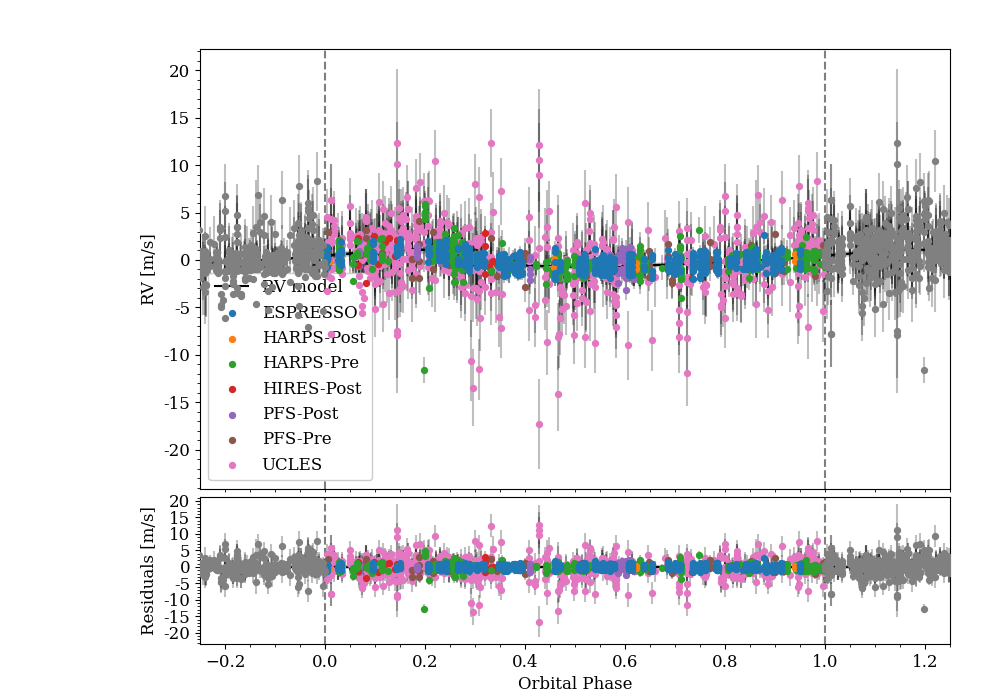

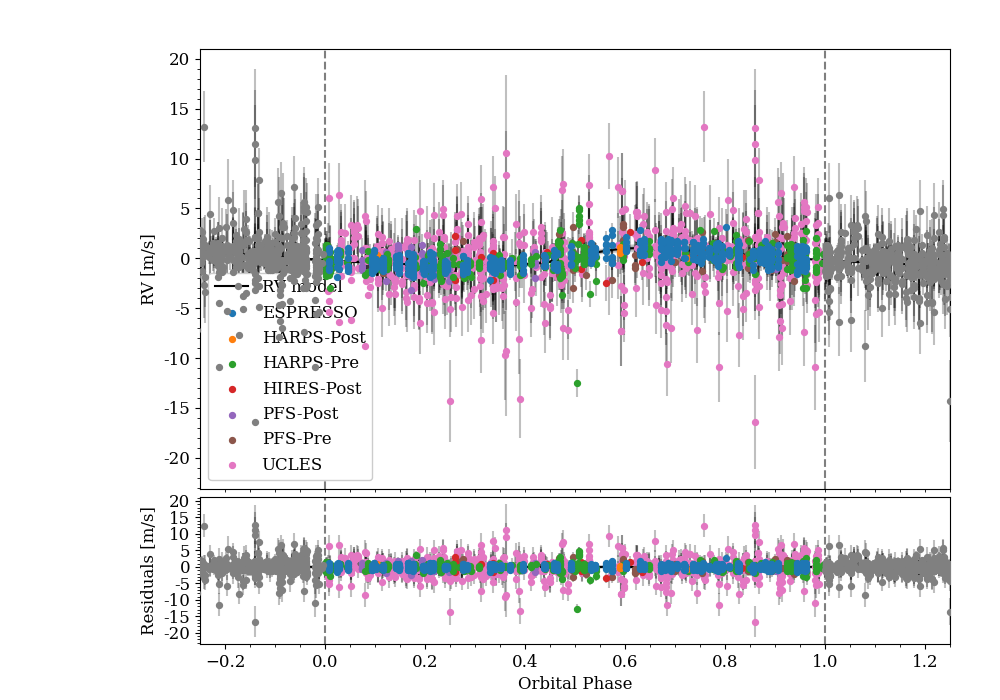

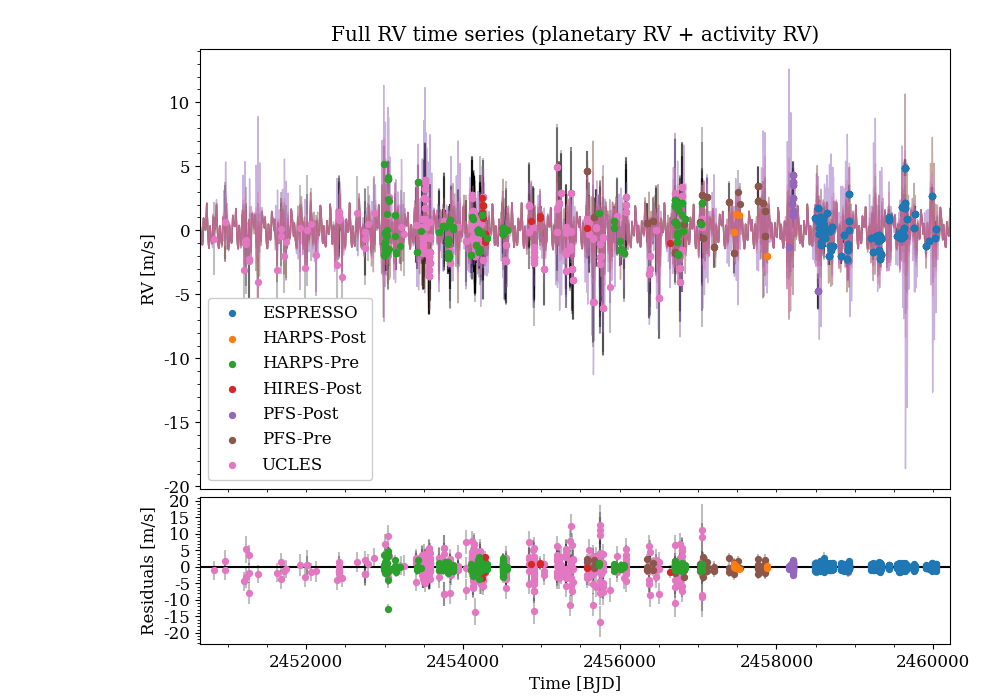

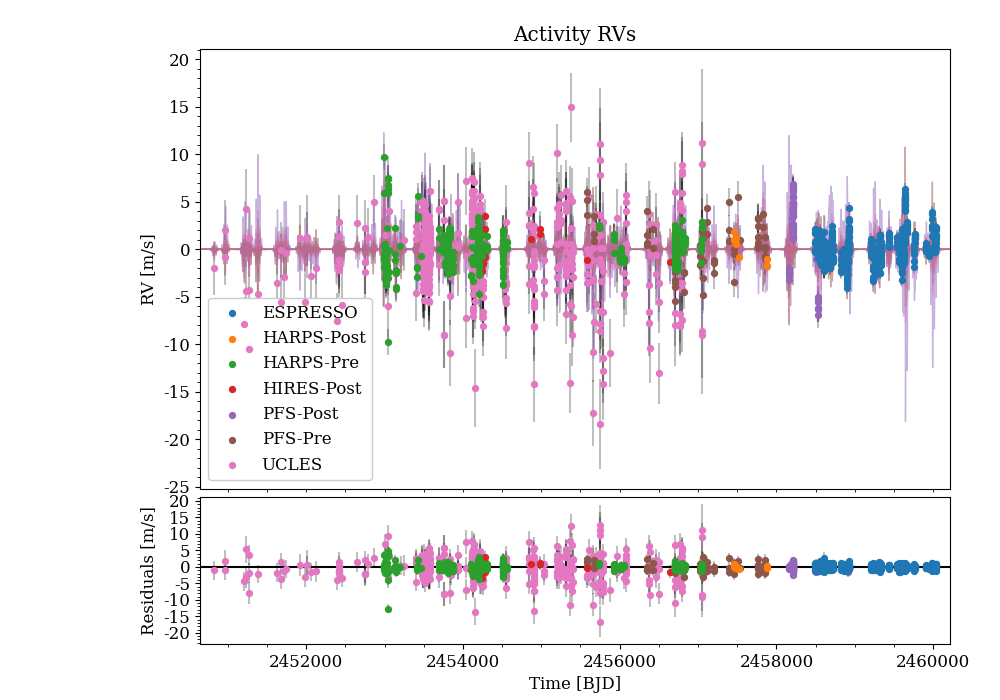

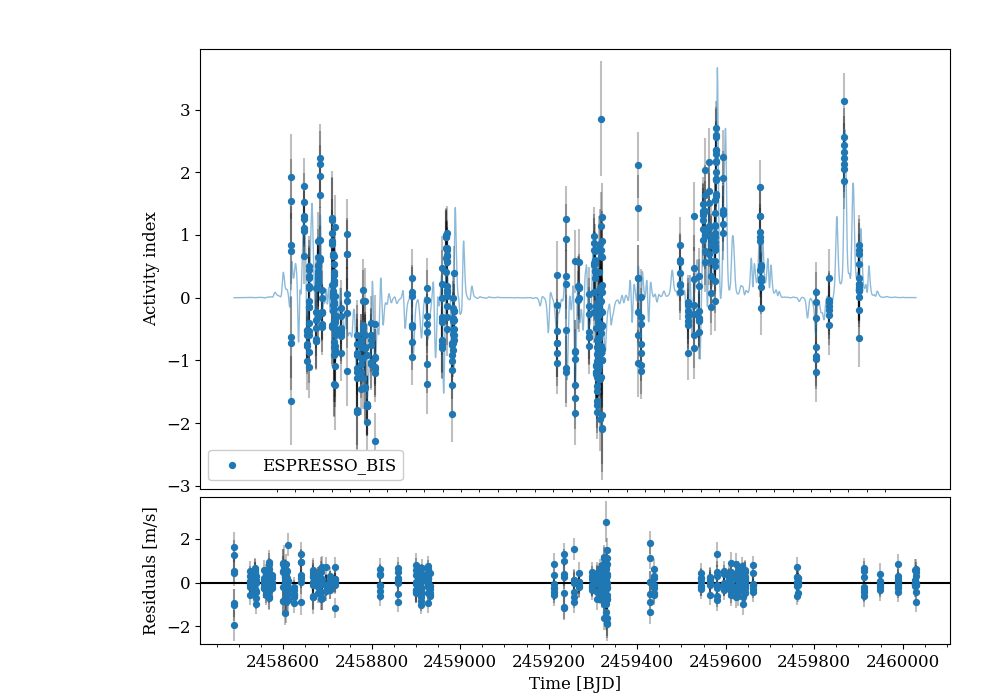

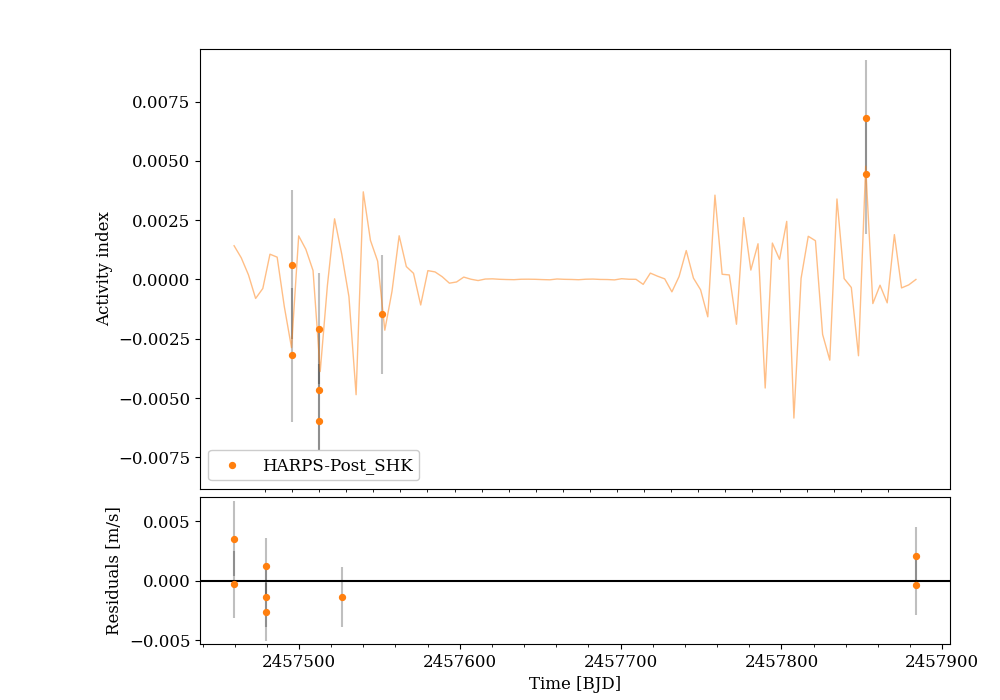

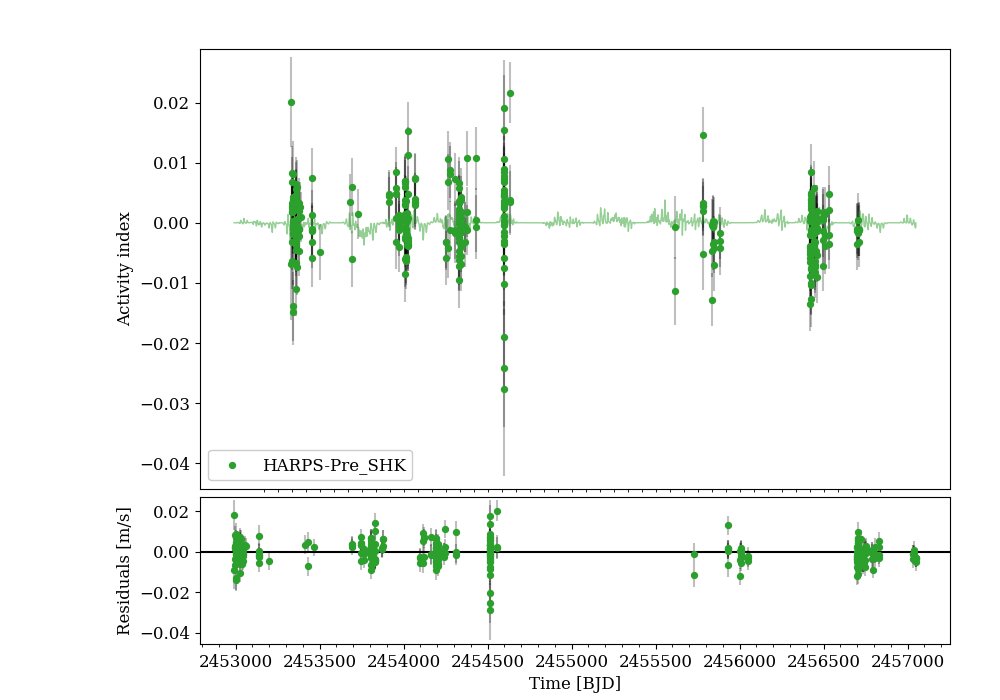

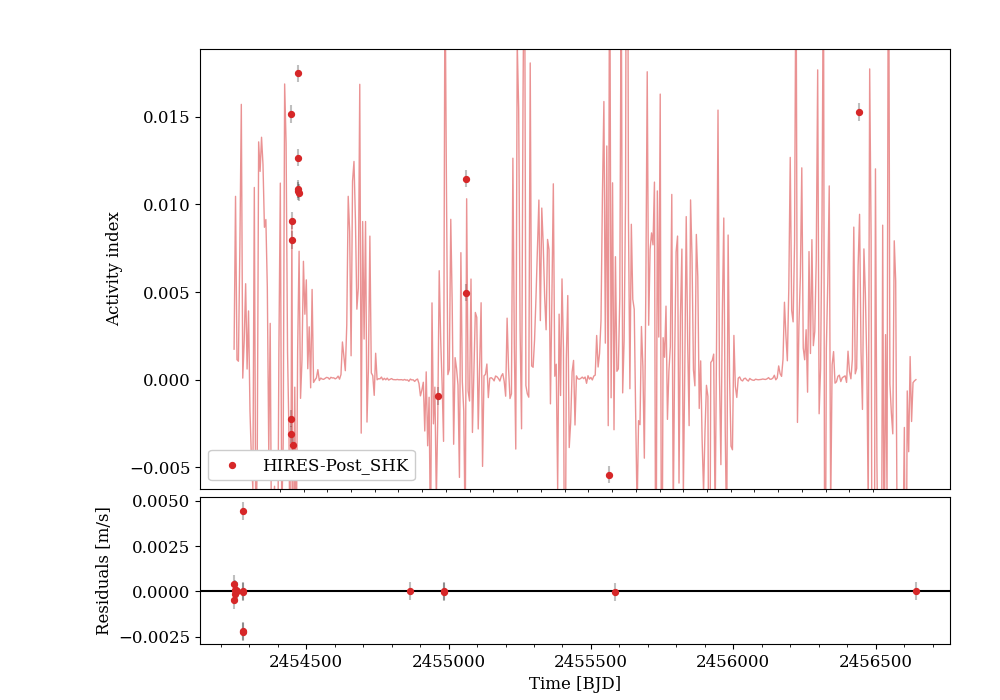

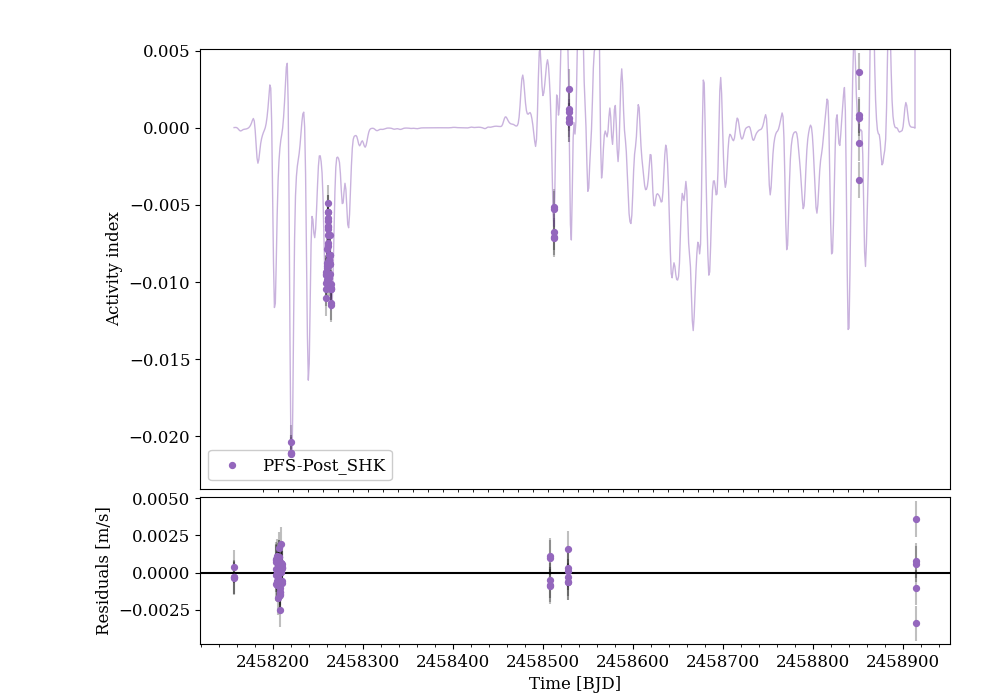

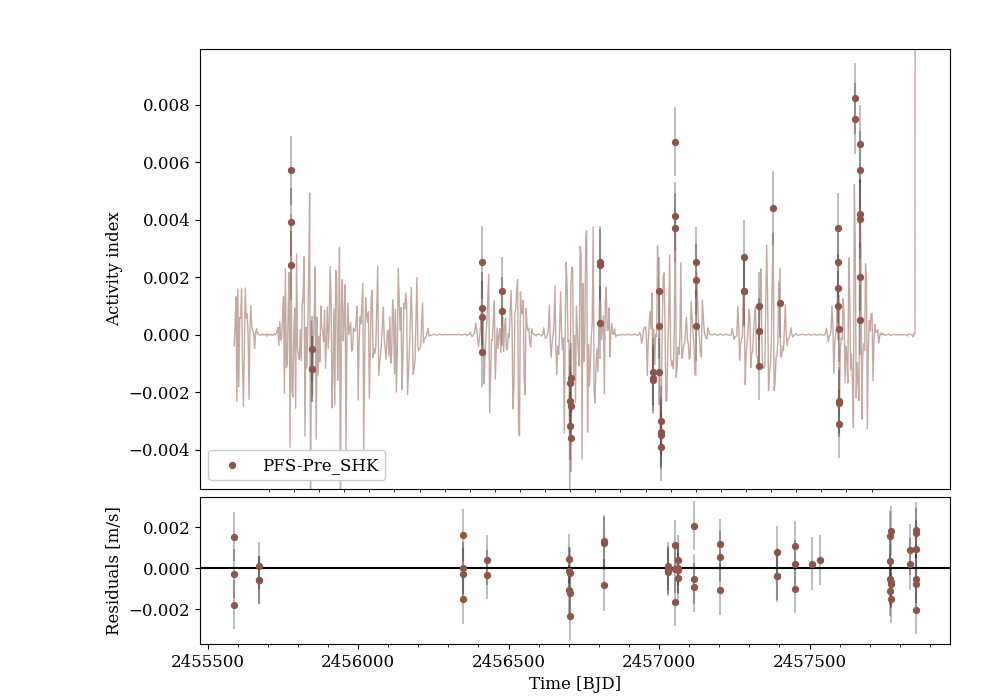

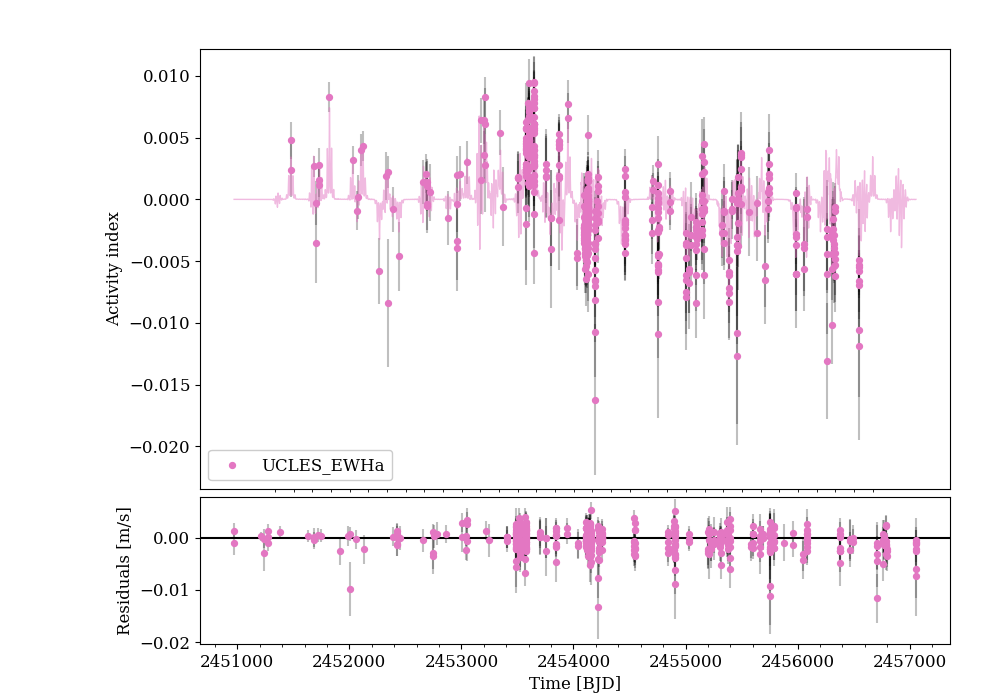

In [ ]:
## DIFFERENT TRY ##

"""
Combined RV and Activity Plotting Notebook
Easily customizable for different datasets
"""

# Planet configuration
# Set to True to enable planet c, False to disable
ENABLE_PLANET_C = True

# ============================================================================
# CONFIGURATION SECTION - CUSTOMIZE HERE
# ============================================================================

if 1: # HD 102365 (updated for new yaml configuration)
    # Base directories: you can customize as needed for new run directories or outputs
    dir_base = '/work2/lbuc/iara/GitHub/PyORBIT_examples/HD102365/results_HD102365/all_instr/gp/2p/HD102365_all_instr_gp_2p_emcee/'
    dir_mods = 'HD102365_all_instr_gp_2p_emcee/'
    dir_plot = 'emcee_plot/model_files/'
    filename = 'HD102365_all_instr_gp_2p_emcee'

    # --- RV Datasets and labels according to yaml ---
    datasets_list = [
        'HD102365_ESPRESSO_RV',
        'HD102365_HARPS-Post_RV',
        'HD102365_HARPS-Pre_RV',
        'HD102365_HIRES-Post_RV',
        'HD102365_PFS-Post_RV',
        'HD102365_PFS-Pre_RV',
        'HD102365_UCLES_RV'
    ]
    datasets_labels = {
        'HD102365_ESPRESSO_RV':   'ESPRESSO',
        'HD102365_HARPS-Post_RV': 'HARPS-Post',
        'HD102365_HARPS-Pre_RV':  'HARPS-Pre',
        'HD102365_HIRES-Post_RV': 'HIRES-Post',
        'HD102365_PFS-Post_RV':   'PFS-Post',
        'HD102365_PFS-Pre_RV':    'PFS-Pre',
        'HD102365_UCLES_RV':      'UCLES'
    }

    activity_model = 'gp_multidimensional'

    # --- Activity Datasets and labels from yaml ---
    activity_list = [
        'HD102365_ESPRESSO_BIS',
        #'HD102365_ESPRESSO_FWHM',
        'HD102365_HARPS-Post_SHK',
        'HD102365_HARPS-Pre_SHK',
        'HD102365_HIRES-Post_SHK',
        'HD102365_PFS-Post_SHK',
        'HD102365_PFS-Pre_SHK',
        'HD102365_UCLES_EWHa'
    ]
    activity_labels = {
        'HD102365_ESPRESSO_BIS':     'ESPRESSO_BIS',
        #'HD102365_ESPRESSO_FWHM':    'ESPRESSO_FWHM',
        'HD102365_HARPS-Post_SHK':   'HARPS-Post_SHK',
        'HD102365_HARPS-Pre_SHK':    'HARPS-Pre_SHK',
        'HD102365_HIRES-Post_SHK':   'HIRES-Post_SHK',
        'HD102365_PFS-Post_SHK':     'PFS-Post_SHK',
        'HD102365_PFS-Pre_SHK':      'PFS-Pre_SHK',
        'HD102365_UCLES_EWHa':       'UCLES_EWHa'
    }

    # Your stated first/last datapoints (FULL BJD)
    BJD_DATA_MIN = 2450830.213590
    BJD_DATA_MAX = 2460029.854401

    # Padding fraction for nicer margins (change if desired)
    BJD_PAD_FRAC = 0.02  # 2% padding on each side

    span = BJD_DATA_MAX - BJD_DATA_MIN
    pad = BJD_PAD_FRAC * span

    # Window used for Plot 2 & 3 (FULL BJD + padding)
    BJD_PLOT_MIN = BJD_DATA_MIN - pad
    BJD_PLOT_MAX = BJD_DATA_MAX + pad

    activity_dict = {
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [BJD_PLOT_MIN, BJD_PLOT_MAX],  # FULL BJD with padding
        # 'limits_full_y': [-13.5, 13.5],
        # 'limits_residuals_y': [-11.5, 11.5],
    }

    full_dict = {
        'reference_planet': 'b',
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [BJD_PLOT_MIN, BJD_PLOT_MAX],  # FULL BJD with padding
    }

# Plotting parameters
font_label = 12
dot_size = 18
figsize = (10, 7)

# ============================================================================
# END OF CONFIGURATION SECTION
# ============================================================================

# ============================================================================
# IMPORTS
# ============================================================================
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec
import matplotlib
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import itertools

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================
def plots_in_grid():
    """
    Create a 2-panel grid layout for main plot and residuals
    """
    gs = gridspec.GridSpec(2, 1, height_ratios=[3.0, 1.0])
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1])

    # Adding minor ticks only to x axis
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)

    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False, style='plain')
    ax_1.ticklabel_format(useOffset=False, style='plain')

    return ax_0, ax_1

def clip_by_xlim(x, *ys, xlim=None):
    """
    Clip arrays by xlim. Returns (x_clipped, y1_clipped, y2_clipped, ...)
    """
    if xlim is None:
        return (x, *ys)
    x = np.asarray(x)
    m = (x >= xlim[0]) & (x <= xlim[1])
    out = [x[m]]
    for y in ys:
        out.append(np.asarray(y)[m])
    return tuple(out)

# ============================================================================
# LOAD DATA AND SETUP PLANET DICTIONARY
# ============================================================================
summary_percentiles_parameters = pickle.load(
    open(dir_base + dir_mods + 'emcee_plot/dictionaries/summary_percentiles_parameters.p', 'rb')
)
summary_percentiles_derived = pickle.load(
    open(dir_base + dir_mods + 'emcee_plot/dictionaries/summary_percentiles_derived.p', 'rb')
)

planet_dict = collections.OrderedDict()

# Planet b configuration
planet_name = 'b'
planet_dict[planet_name] = {
    'P': summary_percentiles_parameters[planet_name]['P'][3],
    'limits_folded_x': [-0.25, 1.25],
    'transit_folded': False,
    'K_error_1sigma': (summary_percentiles_parameters[planet_name]['K'][4] -
                       summary_percentiles_parameters[planet_name]['K'][2]) / 2,
    'K_error_2sigma': (summary_percentiles_parameters[planet_name]['K'][5] -
                       summary_percentiles_parameters[planet_name]['K'][1]) / 2,
    'K_error_3sigma': (summary_percentiles_parameters[planet_name]['K'][6] -
                       summary_percentiles_parameters[planet_name]['K'][0]) / 2,
}

# Planet c configuration (optional)
if ENABLE_PLANET_C:
    planet_name = 'c'
    planet_dict[planet_name] = {
        'P': summary_percentiles_parameters[planet_name]['P'][3],
        'limits_folded_x': [-0.25, 1.25],
        'transit_folded': False,
        'K_error_1sigma': (summary_percentiles_parameters[planet_name]['K'][4] -
                           summary_percentiles_parameters[planet_name]['K'][2]) / 2,
        'K_error_2sigma': (summary_percentiles_parameters[planet_name]['K'][5] -
                           summary_percentiles_parameters[planet_name]['K'][1]) / 2,
        'K_error_3sigma': (summary_percentiles_parameters[planet_name]['K'][6] -
                           summary_percentiles_parameters[planet_name]['K'][0]) / 2,
    }

print("Planet dictionary loaded:")
print(planet_dict)

# ============================================================================
# PLOT 1: FOLDED RV PLOTS FOR EACH PLANET
# ============================================================================
print("\n" + "="*60)
print("GENERATING FOLDED RV PLOTS")
print("="*60)

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams.update({'font.size': font_label})

# Assign colors to datasets
dataset_colors = {}
for i, dataset in enumerate(datasets_list):
    dataset_colors[dataset] = 'C{}'.format(i)

for key_name, key_val in planet_dict.items():
    print(f"\nProcessing planet {key_name}...")

    RV_kep = np.genfromtxt(
        dir_base + dir_mods + dir_plot + 'RV_planet_' + key_name + '_kep.dat',
        skip_header=1
    )

    if key_val.get('transit_folded', True):
        RV_pha = np.genfromtxt(
            dir_base + dir_mods + dir_plot + 'RV_planet_' + key_name + '_Tcf.dat',
            skip_header=1
        )
    else:
        RV_pha = np.genfromtxt(
            dir_base + dir_mods + dir_plot + 'RV_planet_' + key_name + '_pha.dat',
            skip_header=1
        )

    fig = plt.figure(figsize=figsize)
    ax_0, ax_1 = plots_in_grid()

    # Error bands
    K_error_1sigma = key_val['K_error_1sigma']
    K_error_2sigma = key_val['K_error_2sigma']
    K_error_3sigma = key_val['K_error_3sigma']
    K_rvs = np.amax(RV_pha[:, 1])
    RV_unitary = RV_pha[:, 1] / K_rvs

    ax_0.fill_between(RV_pha[:, 0], RV_unitary*(K_rvs-K_error_1sigma),
                      y2=RV_unitary*(K_rvs+K_error_1sigma),
                      alpha=0.10, color='black', zorder=0)
    ax_0.fill_between(RV_pha[:, 0], RV_unitary*(K_rvs-K_error_2sigma),
                      y2=RV_unitary*(K_rvs+K_error_2sigma),
                      alpha=0.10, color='black', zorder=0)
    ax_0.fill_between(RV_pha[:, 0], RV_unitary*(K_rvs-K_error_3sigma),
                      y2=RV_unitary*(K_rvs+K_error_3sigma),
                      alpha=0.10, color='black', zorder=0)

    # Plot model
    ax_0.plot(RV_pha[:, 0]-1, RV_pha[:, 1], color='k', linestyle='-',
              zorder=2, label='RV model')
    ax_0.plot(RV_pha[:, 0]+1, RV_pha[:, 1], color='k', linestyle='-', zorder=2)

    # Plot data for each dataset
    for n_dataset, dataset in enumerate(datasets_list):
        color = dataset_colors[dataset]

        RV_mod = np.genfromtxt(
            dir_base + dir_mods + dir_plot + dataset + '_radial_velocities_' + key_name + '.dat',
            skip_header=1
        )
        error = np.sqrt(RV_mod[:, 9]**2 + RV_mod[:, 12]**2)

        if key_val.get('transit_folded', False):
            rv_phase = RV_mod[:, 1] / planet_dict[key_name]['P']
        else:
            rv_phase = RV_mod[:, 2]

        # Main points
        ax_0.errorbar(rv_phase, RV_mod[:, 8], yerr=error, color='black',
                      markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase, RV_mod[:, 8], c=color, s=dot_size,
                     zorder=20-n_dataset, alpha=1.0, label=datasets_labels[dataset])

        # Points at phase-1
        ax_0.errorbar(rv_phase-1, RV_mod[:, 8], yerr=error, color='black',
                      markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase-1, RV_mod[:, 8], c='gray', s=dot_size, zorder=20, alpha=1.0)

        # Points at phase+1
        ax_0.errorbar(rv_phase+1, RV_mod[:, 8], yerr=error, color='black',
                      markersize=0, alpha=0.25, fmt='o', zorder=0)
        ax_0.scatter(rv_phase+1, RV_mod[:, 8], c='gray', s=dot_size, zorder=20, alpha=1.0)

        # Residuals
        ax_1.errorbar(rv_phase, RV_mod[:, 10], yerr=error, color='black',
                      markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase, RV_mod[:, 10], c=color, s=dot_size,
                     zorder=20-n_dataset, alpha=1.0)

        # Residuals at phase-1
        ax_1.errorbar(rv_phase-1, RV_mod[:, 10], yerr=error, color='black',
                      markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase-1, RV_mod[:, 10], c='gray', s=dot_size, zorder=20, alpha=1.0)

        # Residuals at phase+1
        ax_1.errorbar(rv_phase+1, RV_mod[:, 10], yerr=error, color='black',
                      markersize=0, alpha=0.25, fmt='o', zorder=1)
        ax_1.scatter(rv_phase+1, RV_mod[:, 10], c='gray', s=dot_size, zorder=20, alpha=1.0)

    # Residuals zero line and error bands
    ax_1.axhline(0.000, c='k', zorder=3)
    ax_1.fill_between(RV_pha[:, 0], -K_error_1sigma, K_error_1sigma,
                      alpha=0.10, color='black', zorder=0)
    ax_1.fill_between(RV_pha[:, 0], -K_error_2sigma, K_error_2sigma,
                      alpha=0.10, color='black', zorder=0)
    ax_1.fill_between(RV_pha[:, 0], -K_error_3sigma, K_error_3sigma,
                      alpha=0.10, color='black', zorder=0)

    # Set limits
    if key_val.get('limits_folded_x', False):
        ax_0.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
        ax_1.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
    if key_val.get('limits_folded_y', False):
        ax_0.set_ylim(key_val['limits_folded_y'][0], key_val['limits_folded_y'][1])
    if key_val.get('limits_residuals_y', False):
        ax_1.set_ylim(key_val['limits_residuals_y'][0], key_val['limits_residuals_y'][1])

    # Vertical lines
    if key_val.get('transit_folded', False):
        ax_0.axvline(-0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_0.axvline(0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(-0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(0.500, c='k', zorder=3, alpha=0.5, linestyle='--')
    else:
        ax_0.axvline(0.00, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_0.axvline(1.00, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(0.00, c='k', zorder=3, alpha=0.5, linestyle='--')
        ax_1.axvline(1.00, c='k', zorder=3, alpha=0.5, linestyle='--')

    # Formatting
    ax_0.axes.get_xaxis().set_ticks([])
    ax_0.yaxis.set_major_locator(MultipleLocator(5))
    ax_0.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax_0.yaxis.set_minor_locator(MultipleLocator(1))
    ax_1.yaxis.set_major_locator(MultipleLocator(5))
    ax_1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax_1.yaxis.set_minor_locator(MultipleLocator(1))

    ax_0.set_ylabel('RV [m/s]')
    ax_1.set_xlabel('Orbital Phase')
    ax_1.set_ylabel('Residuals [m/s]')

    handles, labels = ax_0.get_legend_handles_labels()
    from collections import OrderedDict
    unique = OrderedDict()
    for h, l in zip(handles, labels):
        if l not in unique and l is not None:
            unique[l] = h
    ax_0.legend(unique.values(), unique.keys(), framealpha=1.0, loc='lower left')

    plot_filename = filename + '_' + key_name + '_folded.png'
    print(f'Folded plot for planet {key_name} saved to: {plot_filename}')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# ============================================================================
# PLOT 2: FULL RV TIME SERIES
# ============================================================================
print("\n" + "="*60)
print("GENERATING FULL RV TIME SERIES PLOT")
print("="*60)

key_name = full_dict['reference_planet']
xlim_full = full_dict['limits_bjd']  # FULL BJD + padding

fig = plt.figure(figsize=figsize)
ax_0, ax_1 = plots_in_grid()
ax_0.set_title('Full RV time series (planetary RV + activity RV)')

for n_dataset, dataset in enumerate(datasets_list):
    print(f"Processing dataset: {dataset}")
    default_color = 'C' + repr(n_dataset)

    RV_full = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_full.dat',
        skip_header=1
    )

    # FULL BJD model (clip to avoid "empty wings")
    x_m, y_m = clip_by_xlim(RV_full[:, 0], RV_full[:, 1], xlim=xlim_full)
    ax_0.plot(x_m, y_m, color=default_color,
              linestyle='-', zorder=2, lw=1, alpha=0.5)

    RV_mod = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_radial_velocities_' + key_name + '.dat',
        skip_header=1
    )
    error = np.sqrt(RV_mod[:, 9]**2 + RV_mod[:, 12]**2)

    # FULL BJD data (also clip so autoscale can't expand)
    x_d, y_d, y_r, e_d = clip_by_xlim(
        RV_mod[:, 0],
        RV_mod[:, 7] - RV_mod[:, 5],
        RV_mod[:, 10],
        error,
        xlim=xlim_full
    )

    ax_0.errorbar(x_d, y_d, yerr=e_d,
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(x_d, y_d, c=default_color,
                 s=dot_size, zorder=20-n_dataset, alpha=1.0, label=datasets_labels[dataset])

    ax_1.errorbar(x_d, y_r, yerr=e_d, color='black',
                  markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(x_d, y_r, c=default_color,
                 s=dot_size, zorder=20-n_dataset, alpha=1.0)

ax_1.axhline(0.000, c='k', zorder=3)

# Set limits
if full_dict.get('limits_full_y', False):
    ax_0.set_ylim(full_dict['limits_full_y'])
if full_dict.get('limits_residuals_y', False):
    ax_1.set_ylim(full_dict['limits_residuals_y'])

ax_0.set_xlim(xlim_full)
ax_1.set_xlim(xlim_full)

# Formatting
ax_0.axes.get_xaxis().set_ticks([])
ax_0.yaxis.set_major_locator(MultipleLocator(5))
ax_0.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_0.yaxis.set_minor_locator(MultipleLocator(1))
ax_1.yaxis.set_major_locator(MultipleLocator(5))
ax_1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_1.yaxis.set_minor_locator(MultipleLocator(1))

ax_0.set_ylabel('RV [m/s]')
ax_1.set_xlabel('Time [BJD]')
ax_1.set_ylabel('Residuals [m/s]')

handles, labels = ax_0.get_legend_handles_labels()
from collections import OrderedDict
unique = OrderedDict()
for h, l in zip(handles, labels):
    if l not in unique and l is not None:
        unique[l] = h
ax_0.legend(unique.values(), unique.keys(), framealpha=1.0, loc='lower left')

plot_filename = filename + '_full_model.png'
print(f'Full RV plot saved to: {plot_filename}')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# ============================================================================
# PLOT 3: ACTIVITY INDICATORS (COMBINED)
# ============================================================================
print("\n" + "="*60)
print("GENERATING COMBINED ACTIVITY PLOT")
print("="*60)

xlim_act = activity_dict['limits_bjd']  # FULL BJD + padding

fig = plt.figure(figsize=figsize)
ax_0, ax_1 = plots_in_grid()
ax_0.set_title('Activity RVs')

for n_dataset, dataset in enumerate(datasets_list):
    print(f"Processing dataset: {dataset}")
    default_color = 'C' + repr(n_dataset)

    # Plot model in dataset color (clip to avoid "empty wings")
    activity_full = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '_full.dat',
        skip_header=1
    )
    x_m, y_m = clip_by_xlim(activity_full[:, 0], activity_full[:, 3], xlim=xlim_act)
    ax_0.plot(x_m, y_m, color=default_color,
              linestyle='-', zorder=2, lw=1, alpha=0.5)

    activity_mod = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '.dat',
        skip_header=1
    )
    error = np.sqrt(activity_mod[:, 9]**2 + activity_mod[:, 12]**2)

    # FULL BJD data (clip)
    x_d, y_d, y_r, e_d = clip_by_xlim(
        activity_mod[:, 0],
        activity_mod[:, 8],
        activity_mod[:, 10],
        error,
        xlim=xlim_act
    )

    ax_0.errorbar(x_d, y_d, yerr=e_d,
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(x_d, y_d, c=default_color,
                 s=dot_size, zorder=20-n_dataset, alpha=1.0, label=datasets_labels[dataset])

    ax_1.errorbar(x_d, y_r, yerr=e_d,
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(x_d, y_r, c=default_color,
                 s=dot_size, zorder=20-n_dataset, alpha=1.0)

ax_1.axhline(0.000, c='k', zorder=3)

# Set limits
if activity_dict.get('limits_full_y', False):
    ax_0.set_ylim(activity_dict['limits_full_y'])
if activity_dict.get('limits_residuals_y', False):
    ax_1.set_ylim(activity_dict['limits_residuals_y'])

ax_0.set_xlim(xlim_act)
ax_1.set_xlim(xlim_act)

# Formatting
ax_0.axes.get_xaxis().set_ticks([])
ax_0.yaxis.set_major_locator(MultipleLocator(5))
ax_0.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_0.yaxis.set_minor_locator(MultipleLocator(1))
ax_1.yaxis.set_major_locator(MultipleLocator(5))
ax_1.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_1.yaxis.set_minor_locator(MultipleLocator(1))

ax_0.set_ylabel('RV [m/s]')
ax_1.set_xlabel('Time [BJD]')
ax_1.set_ylabel('Residuals [m/s]')

handles, labels = ax_0.get_legend_handles_labels()
from collections import OrderedDict
unique = OrderedDict()
for h, l in zip(handles, labels):
    if l not in unique and l is not None:
        unique[l] = h
ax_0.legend(unique.values(), unique.keys(), framealpha=1.0, loc='lower left')

plot_filename = filename + '_activity_RV_model.png'
print(f'Combined activity plot saved to: {plot_filename}')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# ============================================================================
# PLOT 4: INDIVIDUAL ACTIVITY INDICATORS
# ============================================================================
print("\n" + "="*60)
print("GENERATING INDIVIDUAL ACTIVITY PLOTS")
print("="*60)

for n_dataset, dataset in enumerate(activity_list):
    print(f"\nProcessing activity indicator: {dataset}")

    fig = plt.figure(figsize=figsize)
    ax_0, ax_1 = plots_in_grid()

    # Plot model in color matching data
    activity_full = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '_full.dat',
        skip_header=1
    )
    default_color = 'C' + repr(n_dataset)
    ax_0.plot(activity_full[:, 0], activity_full[:, 3], color=default_color,
              linestyle='-', zorder=2, lw=1, alpha=0.5)

    activity_mod = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '.dat',
        skip_header=1
    )
    error = np.sqrt(activity_mod[:, 9]**2 + activity_mod[:, 12]**2)

    ax_0.errorbar(activity_mod[:, 0], activity_mod[:, 8], yerr=error,
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(activity_mod[:, 0], activity_mod[:, 8], c=default_color,
                 s=dot_size, zorder=20-n_dataset, alpha=1.0, label=activity_labels[dataset])

    # Residuals
    ax_1.errorbar(activity_mod[:, 0], activity_mod[:, 10], yerr=error,
                  color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(activity_mod[:, 0], activity_mod[:, 10], c=default_color,
                 s=dot_size, zorder=20-n_dataset, alpha=1.0)

    ax_1.axhline(0.000, c='k', zorder=3)

    # Auto-scale limits
    val_min = np.amin(activity_mod[:, 8] - error)
    val_max = np.amax(activity_mod[:, 8] + error)
    res_min = np.amin(activity_mod[:, 10] - error)
    res_max = np.amax(activity_mod[:, 10] + error)

    #ax_0.set_xlim(activity_dict['limits_bjd'])
    ax_0.set_ylim(val_min - np.abs(val_min)*0.05, val_max + np.abs(val_max)*0.05)
    #ax_1.set_xlim(activity_dict['limits_bjd'])
    ax_1.set_ylim(res_min - np.abs(res_min)*0.05, res_max + np.abs(res_max)*0.05)

    # Formatting
    ax_0.axes.get_xaxis().set_ticks([])
    ax_0.set_ylabel('Activity index')
    ax_1.set_xlabel('Time [BJD]')
    ax_1.set_ylabel('Residuals [m/s]')
    handles, labels = ax_0.get_legend_handles_labels()
    from collections import OrderedDict
    unique = OrderedDict()
    for h, l in zip(handles, labels):
        if l not in unique and l is not None:
            unique[l] = h
    ax_0.legend(unique.values(), unique.keys(), framealpha=1.0, loc='lower left')

    plot_filename = filename + '_activity_' + dataset + '.png'
    print(f'Activity plot for {dataset} saved to: {plot_filename}')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

print("\n" + "="*60)
print("ALL PLOTS GENERATED SUCCESSFULLY!")
print("="*60)
